## 분류 및 예측 
# Neural Network ( 신경망 알고리즘 )

- <a href="2016_2_DM_MBA_08.pdf"> 이론 설명 </a>

- 간단한 정리 
 - 입력 값을 hidden layer 층에 있는 함수를 활용하여 실측값과 예측값의 차를 Gradient decent 알고리즘을 활용하여 줄여나가는 방법
 - 그 알고리즘의 대략적인 모습을 오류 역전파 알고리즘을 활용한다. 그 안에서 가중치를 변화시켜나가는 모습을 Gradient decent을 활용

## 1. Neural Network Analysis using nnet package

In [1]:
install.packages("nnet", repos='http://cran.us.r-project.org')   # 시각화에 부족 
install.packages("devtools", repos='http://cran.us.r-project.org')
install.packages("NeuralNetTools", repos='http://cran.us.r-project.org')   
install.packages("neuralnet", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpkRpeMN\downloaded_packages


Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpkRpeMN\downloaded_packages


Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'NeuralNetTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpkRpeMN\downloaded_packages


Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpkRpeMN\downloaded_packages


In [35]:
library(nnet)
library(caret)
library(ROCR)

 - garson을 사용해야 어떤 변수가 의미 있는지 / 모델에 최적화 되어 있는지 나옴
 - C5.0은 명목형만 예측 가능
 - Neural Network은 모두 가능하나, 추가 기능을 위해서는 바꿔두자!

In [2]:
cb <- read.delim("../1022_Decision Tree_2/Hshopping.txt", stringsAsFactors=FALSE)
cb$반품여부 <- factor(cb$반품여부)	# 명목형 값 예측일 경우

In [4]:
head(cb)

,ID,성별,나이,구매금액,출연자,반품여부
1,1,1,33,2,2,0
2,2,2,21,3,2,1
3,3,1,45,1,1,0
4,4,1,50,2,1,0
5,5,1,21,3,1,1
6,6,1,22,3,1,1


In [6]:
colnames(cb) <- c("ID","SEX","AGE","AMT","STAR","REFUND")

In [8]:
set.seed(1)
inTrain <- createDataPartition(y=cb$REFUND, p=0.6, list=FALSE)
cb.train <- cb[inTrain,]
cb.test <- cb[-inTrain,]

In [9]:
nrow(cb.train)
nrow(cb)

[1] 301

[1] 500

In [10]:
set.seed(123)
nn_model <- nnet(REFUND ~ SEX+AGE+AMT+STAR, data=cb.train, size=3, maxit=1000)	# size=hidden node수

# weights:  19
initial  value 200.606812 
iter  10 value 86.410893
iter  20 value 81.774551
iter  30 value 76.044092
iter  40 value 66.203022
iter  50 value 63.924238
iter  60 value 63.114128
iter  70 value 62.903511
iter  80 value 62.611800
iter  90 value 61.959741
iter 100 value 61.008848
iter 110 value 60.720699
iter 120 value 60.606332
iter 130 value 60.567764
iter 140 value 60.525918
iter 150 value 60.122685
iter 160 value 58.872856
iter 170 value 57.464777
iter 180 value 54.280672
iter 190 value 52.030947
iter 200 value 51.313490
iter 210 value 51.163216
iter 220 value 50.760753
iter 230 value 50.498295
iter 240 value 50.413091
iter 250 value 50.356870
iter 260 value 50.236148
iter 270 value 50.013988
iter 280 value 49.924165
iter 290 value 49.877182
iter 300 value 49.817089
iter 310 value 49.417883
iter 320 value 49.412835
iter 330 value 49.409880
iter 340 value 49.407560
iter 350 value 49.404695
iter 360 value 49.403964
iter 370 value 49.403629
iter 380 value 49.402962
iter 390

 - input 4, nodes in layer 3, output 1
 - inputs features 
 - output features

In [11]:
nn_model

a 4-3-1 network with 19 weights
inputs: SEX AGE AMT STAR 
output(s): REFUND 
options were - entropy fitting 

 - decay 값 : learing rate를 조절할 수 있는 변수. 

In [12]:
nn_model2 <- nnet(REFUND ~ SEX+AGE+AMT+STAR, data=cb.train, size=3, maxit=1000, decay=0.0005)	# size=hidden node수 
nn_model2

# weights:  19
initial  value 188.455489 
iter  10 value 186.884010
iter  20 value 116.019341
iter  30 value 68.883514
iter  40 value 64.999846
iter  50 value 64.366346
iter  60 value 64.047564
iter  70 value 63.339082
iter  80 value 63.061496
iter  90 value 62.997478
iter 100 value 62.079425
iter 110 value 60.713646
iter 120 value 59.860945
iter 130 value 59.738794
iter 140 value 59.709494
iter 150 value 59.459964
iter 160 value 59.075659
iter 170 value 54.856130
iter 180 value 54.170073
iter 190 value 51.815439
iter 200 value 51.531017
iter 210 value 51.429588
iter 220 value 51.418538
iter 230 value 51.405428
iter 240 value 51.399043
final  value 51.395229 
converged


a 4-3-1 network with 19 weights
inputs: SEX AGE AMT STAR 
output(s): REFUND 
options were - entropy fitting  decay=5e-04

 - i : input data
 - b : bias (세타 값 : 시그모이드 함수의 임계) => 맨 앞줄의 b->h_i들의 값들이 시그모이드 임계 (세타)
 - rang 옵션 : weight의 값들의 범위를 지정해 줄 수 있다. 
 - 각 방향에 따라 i1 -> h1 즉, 첫번째 Input값이 hidden layer 1 node에 가는 가중치가 -101.85이다.
 - 선 12개 from 4개 변수 to 3개 노드 + 3개 노드 to 결과치 1개 노드 + bias 4개 = 19 weight

In [13]:
summary(nn_model)

a 4-3-1 network with 19 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1 
  26.33 -101.85    3.32  -69.49   47.08 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2 
-243.83  100.35   -7.51   97.79   20.53 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3 
 -86.52  -17.34    5.66   18.53  -74.97 
   b->o   h1->o   h2->o   h3->o 
   0.57  -35.69   53.31   -2.57 

 - predict만 넣으면, 예측 확율이 나오고 class라고 넣었으니 실제 predict rate이 나온다
 - 같은 predict여도, C5.0 or Neural에 따라 결과값이 달라진다

In [14]:
confusionMatrix(predict(nn_model, newdata=cb.test, type="class"), cb.test$REFUND)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 121  12
         1  16  50
                                          
               Accuracy : 0.8593          
                 95% CI : (0.8031, 0.9044)
    No Information Rate : 0.6884          
    P-Value [Acc > NIR] : 1.999e-08       
                                          
                  Kappa : 0.6777          
 Mcnemar's Test P-Value : 0.5708          
                                          
            Sensitivity : 0.8832          
            Specificity : 0.8065          
         Pos Pred Value : 0.9098          
         Neg Pred Value : 0.7576          
             Prevalence : 0.6884          
         Detection Rate : 0.6080          
   Detection Prevalence : 0.6683          
      Balanced Accuracy : 0.8448          
                                          
       'Positive' Class : 0               
                                          

In [15]:
confusionMatrix(predict(nn_model2, newdata=cb.test, type="class"), cb.test$REFUND)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 127  17
         1  10  45
                                          
               Accuracy : 0.8643          
                 95% CI : (0.8088, 0.9086)
    No Information Rate : 0.6884          
    P-Value [Acc > NIR] : 7.034e-09       
                                          
                  Kappa : 0.6736          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.9270          
            Specificity : 0.7258          
         Pos Pred Value : 0.8819          
         Neg Pred Value : 0.8182          
             Prevalence : 0.6884          
         Detection Rate : 0.6382          
   Detection Prevalence : 0.7236          
      Balanced Accuracy : 0.8264          
                                          
       'Positive' Class : 0               
                                          

### Visualization of NN

In [34]:
install.packages("extrafont", repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
: package 'extrafont' is in use and will not be installed

In [33]:
library(extrafont) 

In [25]:
options(repr.plot.width=4,repr.plot.height=5)

In [32]:
library(devtools)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r') 

SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d


- 선의 굵기에 따라서 중요도? 해당 output에 영향이 많이 가는 정도를 표현해준다.
- nnet을 돌릴때마다 달라지고 해당 traing data set에 따라서 달라진다. 

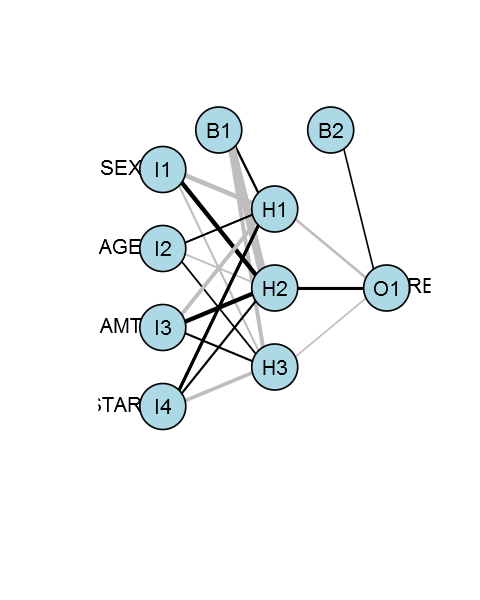

In [26]:
plot.nnet(nn_model)

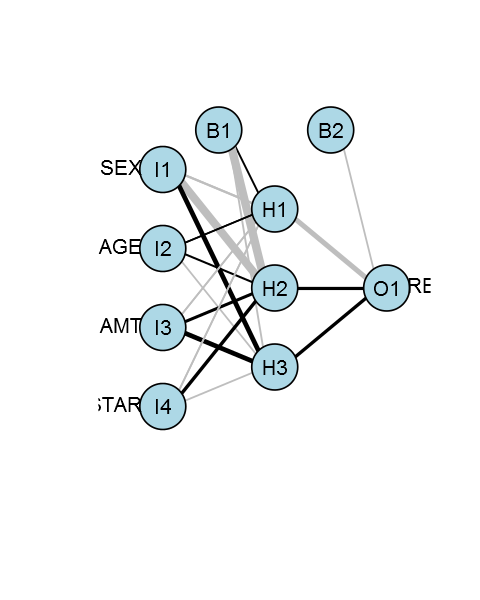

In [28]:
plot.nnet(nn_model2)

In [30]:
library(NeuralNetTools)

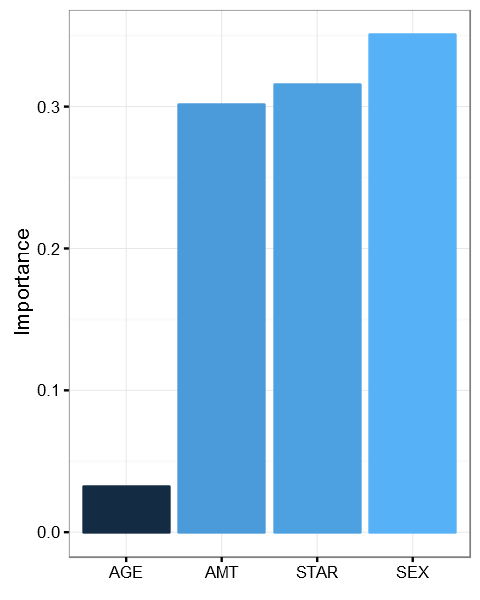

In [31]:
garson(nn_model)   # by 변수 중요도 순서

 - Nnet은 모델을 다 보더라도, weight를 계산하더라도, 이 변수의 의미를 보기에는 부족하다.
 - 모델 전체의 의미로 보고 참고용으로만 본다. 
 
 - **White Box Model : Decision tree **
 - **Black Box Model : Neural Network **

 #### Various Predict function 
 - 같은 predict여도, C5.0 or Nerual에 따라 값이 달라진다. 
 - Each Packages has each prediction, So ROCR::prediction means doing prediction in ROCR 
 - Neural network의 실제값으로 뽑아라 : type "raw"  <- ???

In [36]:
nn_pred <- ROCR::prediction(predict(nn_model, newdata=cb.test, type="raw"), cb.test$REFUND)

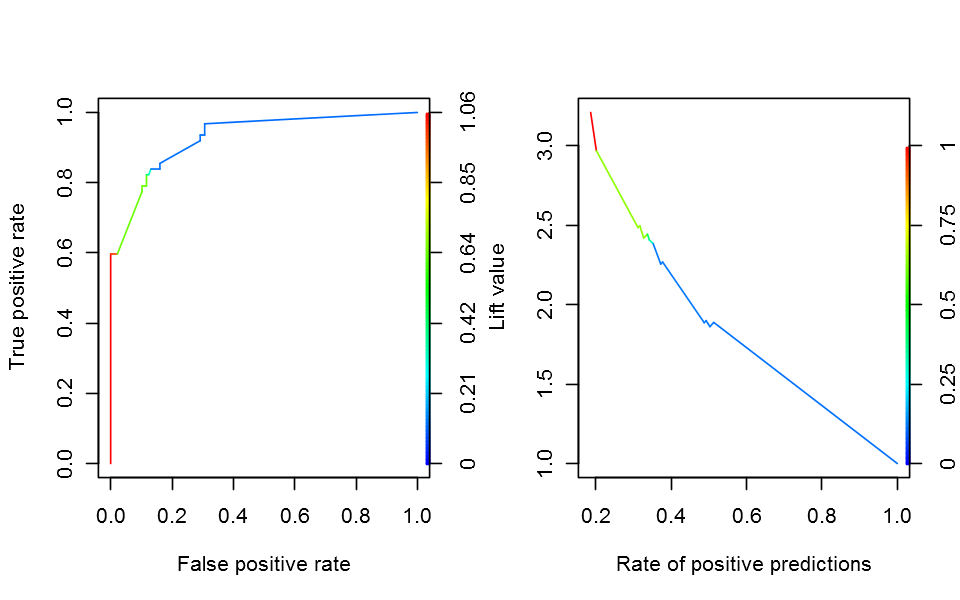

In [38]:
options(repr.plot.width=8,repr.plot.height=5)
par(mfrow=c(1,2))
nn_model.perf1 <- performance(nn_pred, "tpr", "fpr") # ROC-chart
nn_model.perf2 <- performance(nn_pred, "lift", "rpp") # Lift chart
plot(nn_model.perf1, colorize=TRUE); 
plot(nn_model.perf2, colorize=TRUE)

 - 다른 Data로 적용 시, 정확도 이슈 발생
 - Error 함수 as E(w) : weight가 커지면 Error가 커진다. 
 - 람다 as decay 값이 커질수록 w가 커지는 것을 방지한다. 

## 2. Neural Network Analysis using neuralnet package

In [40]:
library(neuralnet)

In [43]:
cb <- read.delim("Hshopping.txt", stringsAsFactors=FALSE)
colnames(cb) <- c("ID","SEX","AGE","AMT","STAR","REFUND")

 - neuralnet 패키지의 목표변수가 numeric이어야 한다. 
 - 시각화 부분이 좋지 못하다.
 - 예측을 할 경우 predict을 사용하지 않고 $compute$로 예측, gwplot as 종속변수의 의미도 추론 가능하다. 

In [44]:
set.seed(1)
inTrain <- createDataPartition(y=cb$REFUND, p=0.6, list=FALSE)
cb.train <- cb[inTrain,]
cb.test <- cb[-inTrain,]

 - threshold = value 
  - error change (에러함수의 결과치 차이(이전 결과와의 차이)가 0.01보다 작아지면 Stop 
 - hidden = c(2,2) 
  - nodes of first layer is $2$
  - nodes of second layer is $2$
 - hidden = c(2,3)
  - nodes of first layer is $2$
  - nodes of second layer is $3$
 - nnet 패키지보다 parameters가 많다 (threshold or stepmax 둘 중 하나를 주로 사용)
 - linear.output=T -> 출력층에는 굳이 log상용화 하지 않고 weight sum 한다 ($sigmoid$ 함수 적용 X)

In [45]:
set.seed(123)
nn2_model <- neuralnet(REFUND ~ SEX+AGE+AMT+STAR, 
                           data=cb.train, hidden=3, threshold=0.01)
nn2_model2 <- neuralnet(REFUND ~ SEX+AGE+AMT+STAR, 
                           data=cb.train, hidden=c(2,3), threshold=0.01)

In [49]:
plot(nn2_model)
plot(nn2_model2)

### result  of plots cell. 
 - Don't Print in Jupyter 
 - what is better than nnet packages
 
 <img src="photo/plot1.PNG" width=450, align="left">
 <img src="photo/plot2.PNG" width=450, align="right">

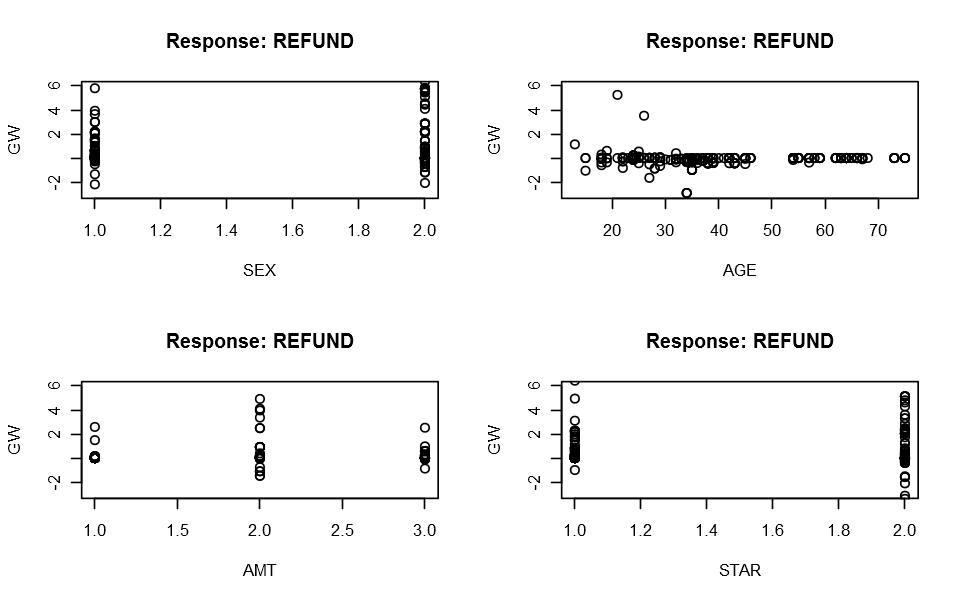

In [50]:
par(mfrow=c(2,2))
gwplot(nn2_model, selected.covariate = "SEX", min=-3, max=6)
gwplot(nn2_model, selected.covariate = "AGE", min=-3, max=6)
gwplot(nn2_model, selected.covariate = "AMT", min=-3, max=6)
gwplot(nn2_model, selected.covariate = "STAR", min=-3, max=6)